# Multiple linear regression

## Grading the professor

### Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, "Beauty in the classroom: instructors' pulchritude and putative pedagogical productivity" (Hamermesh and Parker, 2005) found that instructors who are viewed to be better looking receive higher instructional ratings.

### In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.

### The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors' physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for Data Analysis Using Regression and Multilevel/Hierarchical Models (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/evals.csv'
url_content = requests.get(df_url, verify=False).content
evals = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
evals

score          rank     ethnicity  gender     language  age  \
0      4.7  tenure track      minority  female      english   36   
1      4.1  tenure track      minority  female      english   36   
2      3.9  tenure track      minority  female      english   36   
3      4.8  tenure track      minority  female      english   36   
4      4.6       tenured  not minority    male      english   59   
..     ...           ...           ...     ...          ...  ...   
458    4.5  tenure track  not minority    male      english   32   
459    3.5  tenure track      minority  female  non-english   42   
460    4.4  tenure track      minority  female  non-english   42   
461    4.4  tenure track      minority  female  non-english   42   
462    4.1  tenure track      minority  female  non-english   42   

     cls_perc_eval  cls_did_eval  cls_students cls_level  ...   cls_credits  \
0         55.81395            24            43     upper  ...  multi credit   
1         68.80000            86           125     upper  ...  multi credit   
2         60.80000            76           125     upper  ...  multi credit   
3         62.60163            77           123     upper  ...  multi credit   
4         85.00000            17            20     upper  ...  multi credit   
..             ...           ...           ...       ...  ...           ...   
458       60.46511            52            86     upper  ...  multi credit   
459       57.14286            48            84     upper  ...  multi credit   
460       77.61194            52            67     upper  ...  multi credit   
461       81.81818            54            66     upper  ...  multi credit   
462       80.00000            28            35     lower  ...    one credit   

    bty_f1lower  bty_f1upper  bty_f2upper  bty_m1lower  bty_m1upper  \
0             5            7            6            2            4   
1             5            7            6            2            4   
2             5            7            6            2            4   
3             5            7            6            2            4   
4             4            4            2            2            3   
..          ...          ...          ...          ...          ...   
458           6            6            9            7            8   
459           3            8            7            4            6   
460           3            8            7            4            6   
461           3            8            7            4            6   
462           3            8            7            4            6   

     bty_m2upper  bty_avg  pic_outfit pic_color  
0              6    5.000  not formal     color  
1              6    5.000  not formal     color  
2              6    5.000  not formal     color  
3              6    5.000  not formal     color  
4              3    3.000  not formal     color  
..           ...      ...         ...       ...  
458            5    6.833  not formal     color  
459            4    5.333  not formal     color  
460            4    5.333  not formal     color  
461            4    5.333  not formal     color  
462            4    5.333  not formal     color  

[463 rows x 21 columns]

## Simple linear regression

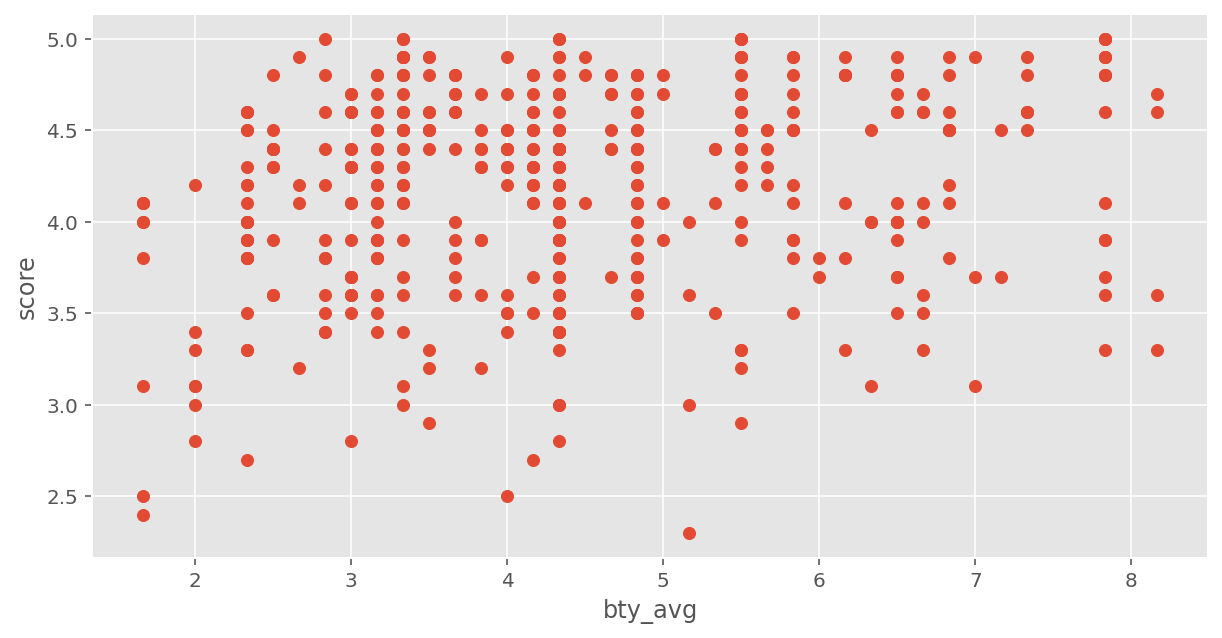

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.scatter(evals.bty_avg, evals.score)
plt.xlabel('bty_avg')
plt.ylabel('score')
plt.show();

## Exercise 1: Fit a linear model called m_bty to predict average professor score by average beauty rating and add the line to your plot.

In [4]:
import statsmodels.api as sm

formula_string = "score ~ bty_avg"

model = sm.formula.ols(formula = formula_string, data = evals)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 04 May 2023   Prob (F-statistic):           5.08e-05
Time:                        11:35:29   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.0

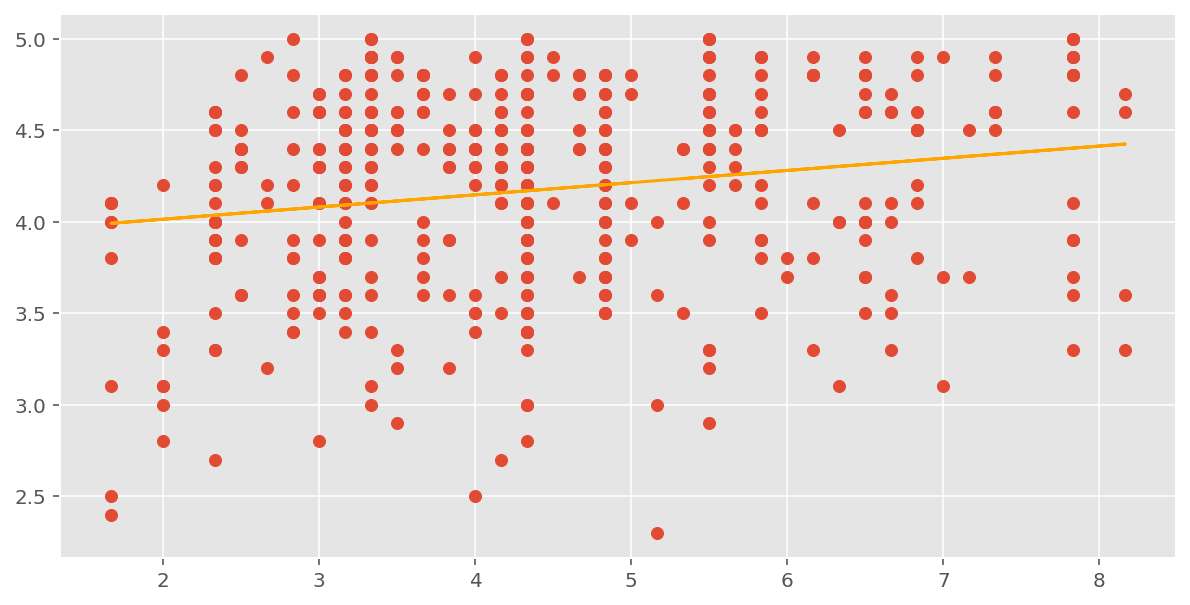

In [6]:
x = evals['bty_avg']
y = evals['score']

y_pred = model_fitted.predict(x)

plt.scatter(evals['bty_avg'], evals['score'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

## Multiple linear regression

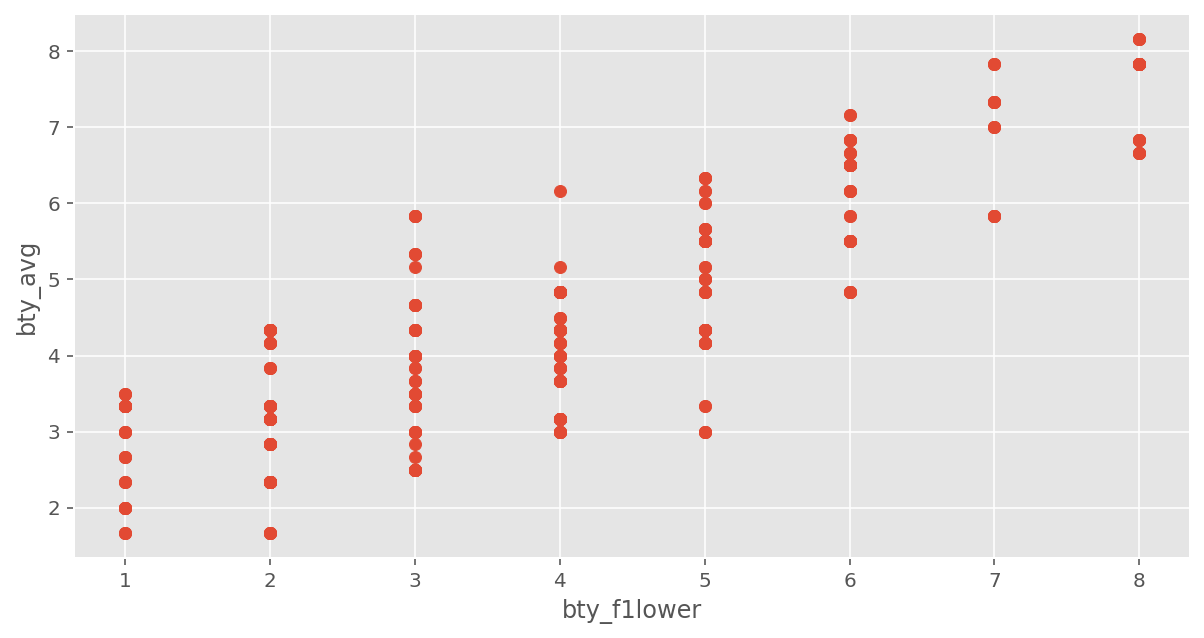

In [9]:
plt.scatter(evals.bty_f1lower, evals.bty_avg)
plt.xlabel('bty_f1lower')
plt.ylabel('bty_avg')
plt.show();

In [10]:
evals.bty_avg.corr(evals.bty_f1lower)

0.8439111692147886

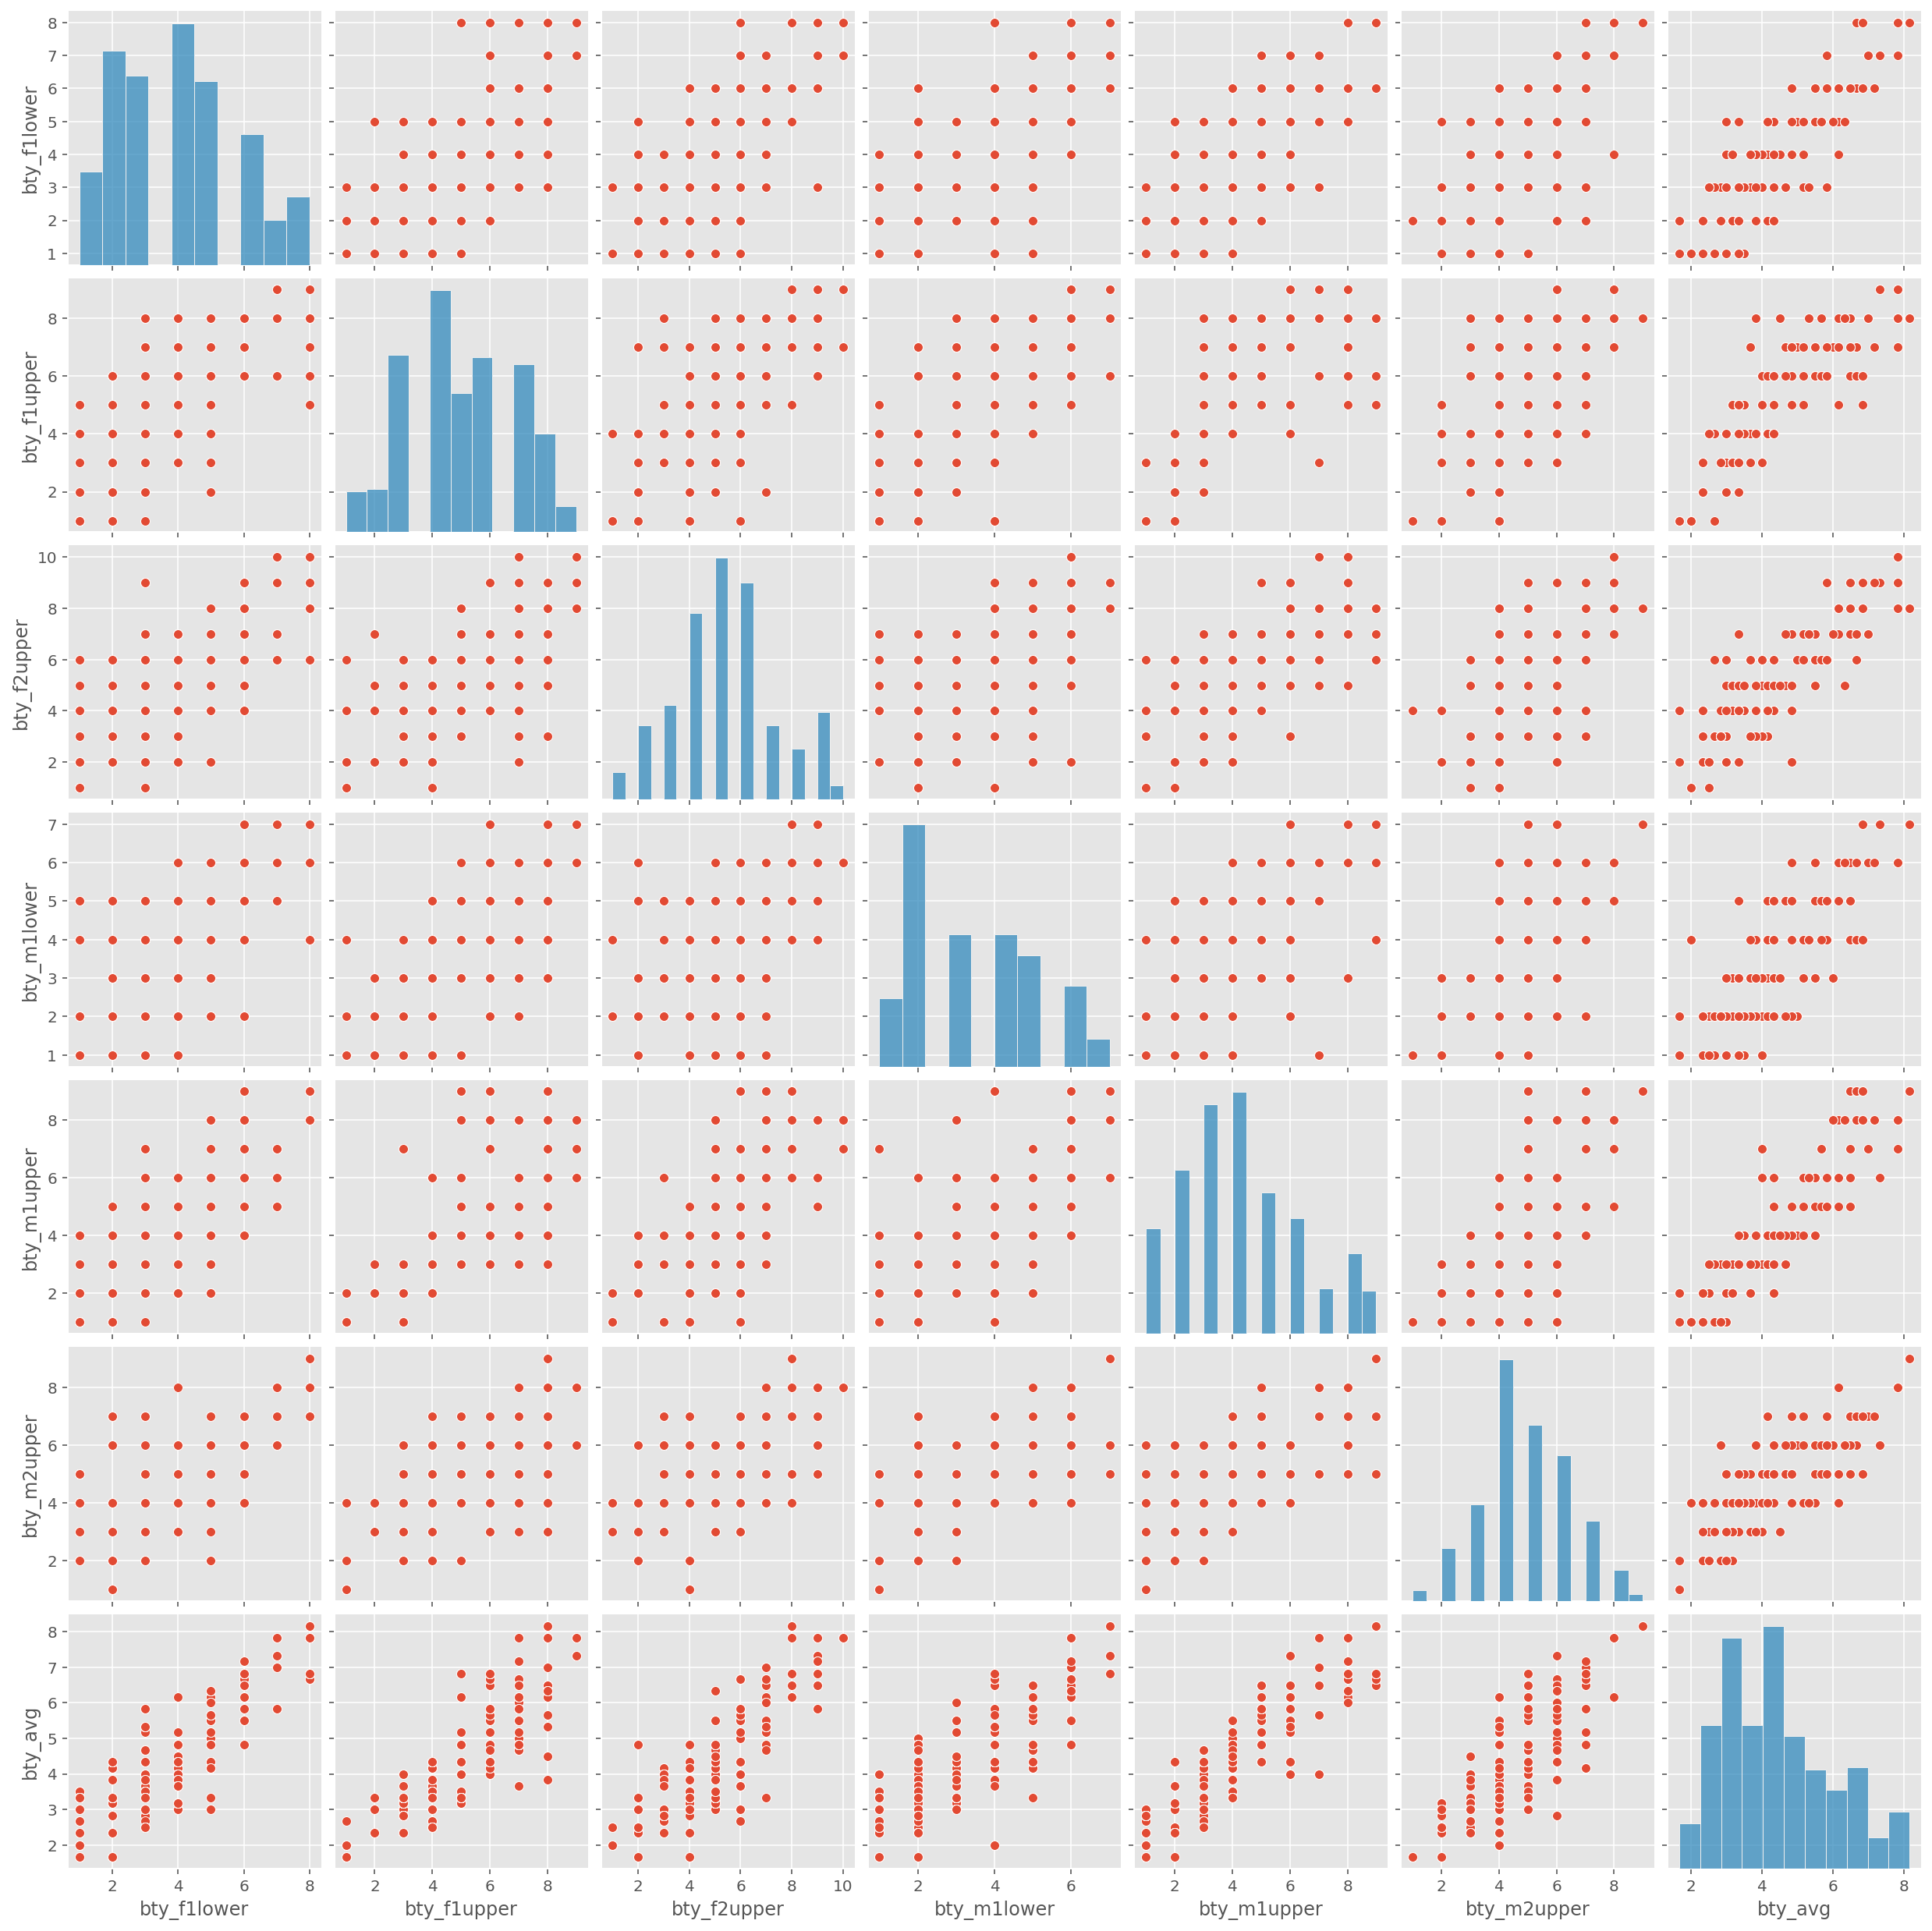

In [11]:
import seaborn as sns

sns.pairplot(evals.iloc[:,12:19])
plt.show();

### In order to see if beauty is still a significant predictor of professor score after we've accounted for the gender of the professor, we can add the gender term into the model.

### Since gender is a nominal category feature, we first need to convert gender from having the values of female and male to being an indicator variable called gender_integer that takes a value of 0 for females and a value of 1 for males (Such variables are often referred to as "dummy" variables.). We can use the replace() function for integer-encoding. Before using the replace() function, we need define a mapping between the levels and the integers using a dictionary as below.

In [12]:
level_mapping = {'female': 0, 'male': 1}

In [15]:
gender_integer = evals['gender'].copy()
gender_integer = gender_integer.replace(level_mapping)
evals['gender_integer'] = gender_integer

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = evals[['bty_avg','gender_integer']].copy()
y = np.array(evals.score).reshape((-1, 1))

# model initialization
mlinear_model = LinearRegression()
# fit the data
mlinear_model.fit(x, y)
# predict
y_pred = mlinear_model.predict(x)
print('Slope:', mlinear_model.coef_)
print('Intercept:', mlinear_model.intercept_)
print('R-squared:', r2_score(y, y_pred))


Slope: [[0.07415537 0.17238955]]
Intercept: [3.74733824]
R-squared: 0.059122790336817665


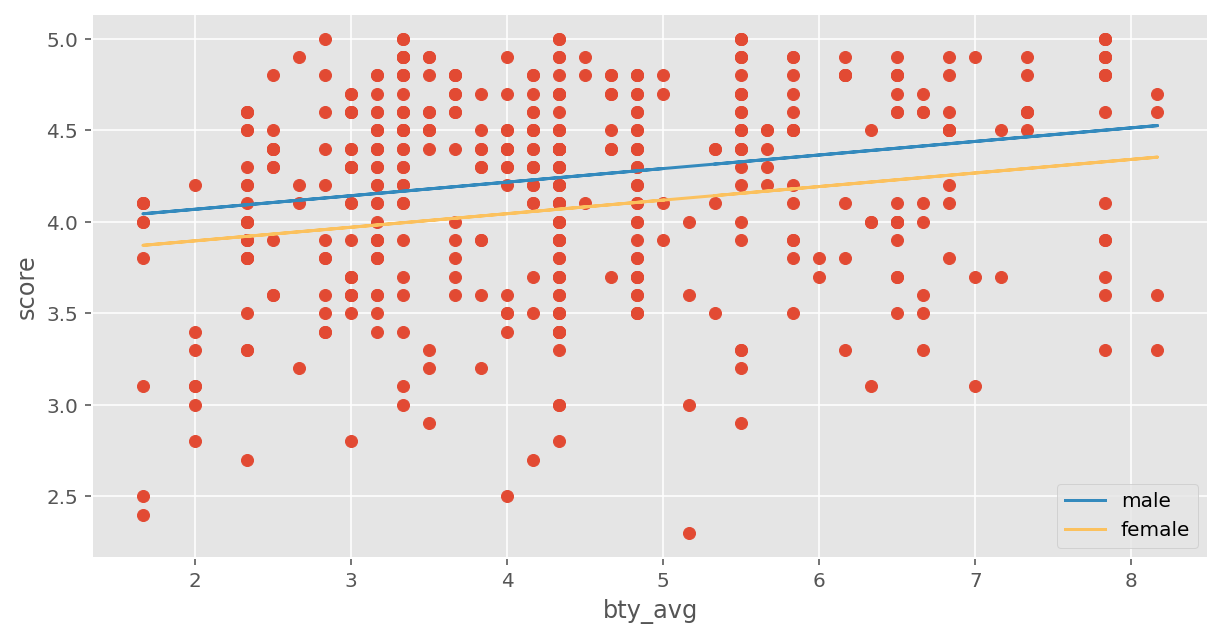

In [18]:
plt.scatter(evals.bty_avg, evals.score, label = '')
plt.xlabel('bty_avg')
plt.ylabel('score')

# male
y_male = 3.74733824 + 0.07415537*evals.bty_avg + 0.17238955*1
plt.plot(evals.bty_avg, y_male, color = 'C8', label = 'male')

# female
y_female = 3.74733824 + 0.07415537*evals.bty_avg + 0.17238955*0
plt.plot(evals.bty_avg, y_female, color = 'C4', label = 'female')

plt.legend(loc = 'lower right')
plt.show();

## The search for the best model

In [19]:
import statsmodels.api as sm

m_full = sm.formula.ols(formula = 'score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.366
Date:                Thu, 04 May 2023   Prob (F-statistic):           6.55e-14
Time:                        11:58:05   Log-Likelihood:                -326.52
No. Observations:                 463   AIC:                             683.0
Df Residuals:                     448   BIC:                             745.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             